In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/ProjectForPaper/Dataset/covid_data.csv')

In [ ]:
df.head()

,tweet_id,created_at,text,loc,user_id,verified
0,1235681413485207552,2020-03-05 21:39:41+00:00,stayfrea alert corona virus spread through mon...,MI,u1,0
1,1235681419554213888,2020-03-05 21:39:42+00:00,matrodamusic corona virus temporary house musi...,UT,u2,0
2,1235681419558637568,2020-03-05 21:39:42+00:00,gainbos whole entire world corona virus danger...,TX,u3,0
3,1235681424809705472,2020-03-05 21:39:44+00:00,ellanjeferguson krystallsheree corona virus,MA,u4,0
4,1235681424809680896,2020-03-05 21:39:44+00:00,bradleoy corona virus said https wwfteavdch,NJ,u5,0


In [ ]:
df.shape

(7229508, 6)

In [ ]:
df.columns

Index(['tweet_id', 'created_at', 'text', 'loc', 'user_id', 'verified'], dtype='object')

In [ ]:
#droping all columns except text column
data=df.drop(['tweet_id','created_at','user_id','verified','loc'], axis=1)

- For now we will perform only sentiment analysis so we drop all columns except text column

In [ ]:
data.head()

,text
0,stayfrea alert corona virus spread through mon...
1,matrodamusic corona virus temporary house musi...
2,gainbos whole entire world corona virus danger...
3,ellanjeferguson krystallsheree corona virus
4,bradleoy corona virus said https wwfteavdch


# For less computing power we will use first 200k rows for further analysis

In [ ]:
# taking frist 200k rows and drop remain rows
data=data.iloc[:200000,:]

# Text Preprocessing: Stemming, Stop-word removal and Lemmatization
Hence in the prepocessing phase we do the following in the oreder below:-
- Begin by removing html tags ( text in the <> )
- Remove any pucntions or limited set of special characters like, or . or # etc.
- Check if the word is made up of english letters and is not alpha-numeric.
- Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letter)
- Convert the word to lowercase
- Remove StopWords.
- Finally Snowball Stemming the word(it observed to be better that Poter Stemming)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 
stop = set(stopwords.words('english')) # set of stopwords in english
sno = nltk.stem.SnowballStemmer('english') # initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, ' ', sentence)
  return cleantext

def cleanpunc(sentence): # funciton to clean word of any punction or symbol
  cleaned = re.sub(r'[?|!|\'|"|#|*|_]',r'',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r'',cleaned)
  return cleaned

In [ ]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase

text=' '
final_string=[]
s=''
for sent in data['text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower()))
                    filtered_sentence.append(s)
                    
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    text =" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(text)

In [ ]:
data['CleanedText']=final_string

In [ ]:
data.head()

,text,CleanedText
0,stayfrea alert corona virus spread through mon...,stayfrea alert corona virus spread money money...
1,matrodamusic corona virus temporary house musi...,matrodamus corona virus temporari hous music f...
2,gainbos whole entire world corona virus danger...,gainbo whole entir world corona virus danger j...
3,ellanjeferguson krystallsheree corona virus,ellanjeferguson krystallshere corona virus
4,bradleoy corona virus said https wwfteavdch,bradleoy corona virus said https wwfteavdch


### After droping text column

In [ ]:
data

,text,CleanedText
0,stayfrea alert corona virus spread through mon...,stayfrea alert corona virus spread money money...
1,matrodamusic corona virus temporary house musi...,matrodamus corona virus temporari hous music f...
2,gainbos whole entire world corona virus danger...,gainbo whole entir world corona virus danger j...
3,ellanjeferguson krystallsheree corona virus,ellanjeferguson krystallshere corona virus
4,bradleoy corona virus said https wwfteavdch,bradleoy corona virus said https wwfteavdch
...,...,...
199995,f_desouche coronavirus détecté grecque lesbos ...,fdesouch coronavirus détecté grecqu lesbo http...
199996,foxnews will turn back your channel when quit ...,foxnew turn back channel quit report corona virus
199997,lovelywontons wah_fulls reading email saying c...,lovelywonton wahful read email say corona viru...
199998,will eradicate corona ruining everything,erad corona ruin everyth


In [ ]:
data.to_csv('cleanTwitte.csv')

We got our clean data set.Now we can perform Sentiment analysis

In [ ]:
# importing libries for sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# Create a function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

data['Subjectivity']=data['CleanedText'].apply(getSubjectivity)
data['Polarity']=data['CleanedText'].apply(getPolarity)

In [ ]:
data.head()

,text,CleanedText,Subjectivity,Polarity
0,stayfrea alert corona virus spread through mon...,stayfrea alert corona virus spread money money...,0.0,0.0
1,matrodamusic corona virus temporary house musi...,matrodamus corona virus temporari hous music f...,0.0,0.0
2,gainbos whole entire world corona virus danger...,gainbo whole entir world corona virus danger j...,0.4,0.2
3,ellanjeferguson krystallsheree corona virus,ellanjeferguson krystallshere corona virus,0.0,0.0
4,bradleoy corona virus said https wwfteavdch,bradleoy corona virus said https wwfteavdch,0.0,0.0


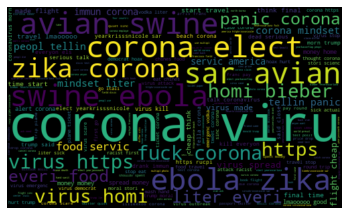

In [ ]:

#Ploting Word cloud
allWords=''.join([twts for twts in data['CleanedText']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis']=data['Polarity'].apply(getAnalysis)

In [ ]:
data.head()

,text,CleanedText,Subjectivity,Polarity,Analysis
0,stayfrea alert corona virus spread through mon...,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,matrodamusic corona virus temporary house musi...,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,gainbos whole entire world corona virus danger...,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,ellanjeferguson krystallsheree corona virus,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,bradleoy corona virus said https wwfteavdch,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [ ]:
data.to_csv('processed_data.csv')

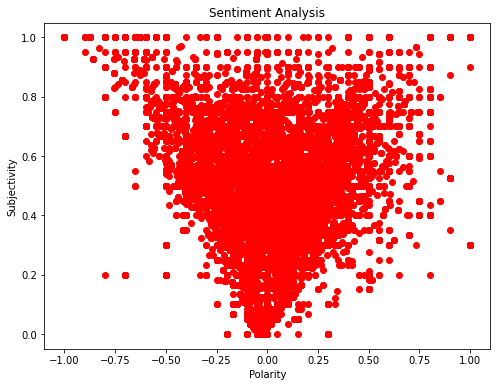

In [ ]:

plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(data['Polarity'],data['Subjectivity'],color='Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# value counts
data['Analysis'].value_counts()

Neutral     114664
Positive     48140
Negative     37196
Name: Analysis, dtype: int64

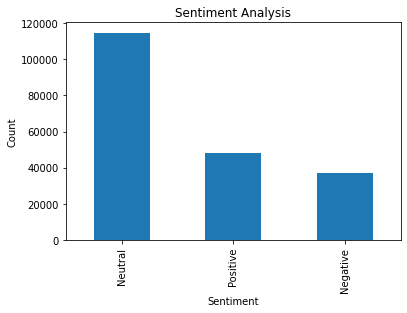

In [ ]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data.head()

,text,CleanedText,Subjectivity,Polarity,Analysis
0,stayfrea alert corona virus spread through mon...,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,matrodamusic corona virus temporary house musi...,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,gainbos whole entire world corona virus danger...,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,ellanjeferguson krystallsheree corona virus,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,bradleoy corona virus said https wwfteavdch,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [ ]:
cleandata = data.drop(['text'],axis=1)

In [ ]:
cleandata.head()

,CleanedText,Subjectivity,Polarity,Analysis
0,stayfrea alert corona virus spread money money...,0.0,0.0,Neutral
1,matrodamus corona virus temporari hous music f...,0.0,0.0,Neutral
2,gainbo whole entir world corona virus danger j...,0.4,0.2,Positive
3,ellanjeferguson krystallshere corona virus,0.0,0.0,Neutral
4,bradleoy corona virus said https wwfteavdch,0.0,0.0,Neutral


In [ ]:
cleandata.to_csv('processed_data')